In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,AreaType,AreaLocality,City,Furnishing Status,TenantPreferred,Bathroom,PointofContact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5/18/2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,5/15/2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,7/10/2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,7/6/2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'AreaType', 'AreaLocality',
       'City', 'Furnishing Status', 'TenantPreferred', 'Bathroom',
       'PointofContact'],
      dtype='object')

In [5]:
data.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
AreaType                3
AreaLocality         2235
City                    6
Furnishing Status       3
TenantPreferred         3
Bathroom                8
PointofContact          3
dtype: int64

In [6]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
AreaType             0
AreaLocality         0
City                 0
Furnishing Status    0
TenantPreferred      0
Bathroom             0
PointofContact       0
dtype: int64

In [7]:
data.drop(['Posted On','AreaLocality','Floor','TenantPreferred'], axis=1, inplace=True)

In [8]:
data

,BHK,Rent,Size,AreaType,City,Furnishing Status,Bathroom,PointofContact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,Contact Owner
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,2,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,3,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,3,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,2,Contact Agent


In [9]:
print(data['City'].value_counts())

print(data['AreaType'].value_counts())

print(data['Furnishing Status'].value_counts())

print(data['PointofContact'].value_counts())

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64
Super Area     2446
Carpet Area    2298
Built Area        2
Name: AreaType, dtype: int64
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: PointofContact, dtype: int64


In [10]:
data = data.replace("Mumbai", 6)
data = data.replace("Chennai", 5) 
data = data.replace("Bangalore", 4)
data = data.replace("Hyderabad", 3)
data = data.replace("Delhi", 2)
data = data.replace("Kolkata", 1) 

In [11]:
data = data.replace("Super Area", 3)
data = data.replace("Carpet Area", 2)
data = data.replace("Built Area", 1) 

In [12]:
data = data.replace("Semi-Furnished", 2)
data = data.replace("Furnished", 3)
data = data.replace("Unfurnished", 1) 

In [13]:
data = data.replace("Contact Owner", 1)
data = data.replace("Contact Agent", 2)
data = data.replace("Contact Builder", 3) 

In [14]:
data

,BHK,Rent,Size,AreaType,City,Furnishing Status,Bathroom,PointofContact
0,2,10000,1100,3,1,1,2,1
1,2,20000,800,3,1,2,1,1
2,2,17000,1000,3,1,2,1,1
3,2,10000,800,3,1,1,1,1
4,2,7500,850,2,1,1,1,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,3,2,2,1
4742,3,29000,2000,3,3,2,3,1
4743,3,35000,1750,2,3,2,3,2
4744,3,45000,1500,2,3,2,2,2


In [15]:
data.describe()

,BHK,Rent,Size,AreaType,City,Furnishing Status,Bathroom,PointofContact
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,2.514960,3.828276,1.760851,1.965866,1.322587
std,0.832256,7.810641e+04,634.202328,0.500671,1.632329,0.684553,0.884532,0.467966
min,1.000000,1.200000e+03,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,2.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,3.000000,4.000000,2.000000,2.000000,1.000000
75%,3.000000,3.300000e+04,1200.000000,3.000000,5.000000,2.000000,2.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,3.000000,6.000000,3.000000,10.000000,3.000000


In [16]:
data.corr()

,BHK,Rent,Size,AreaType,City,Furnishing Status,Bathroom,PointofContact
BHK,1.000000,0.369718,0.716145,-0.153225,0.023944,0.140264,0.794885,0.229764
Rent,0.369718,1.000000,0.413551,-0.214867,0.234468,0.146251,0.441215,0.338966
Size,0.716145,0.413551,1.000000,-0.079705,0.050796,0.172783,0.740703,0.213436
AreaType,-0.153225,-0.214867,-0.079705,1.000000,-0.176979,-0.056276,-0.183012,-0.558047
City,0.023944,0.234468,0.050796,-0.176979,1.000000,0.116952,0.214738,0.308424
Furnishing Status,0.140264,0.146251,0.172783,-0.056276,0.116952,1.000000,0.181425,0.130349
Bathroom,0.794885,0.441215,0.740703,-0.183012,0.214738,0.181425,1.000000,0.326490
PointofContact,0.229764,0.338966,0.213436,-0.558047,0.308424,0.130349,0.326490,1.000000


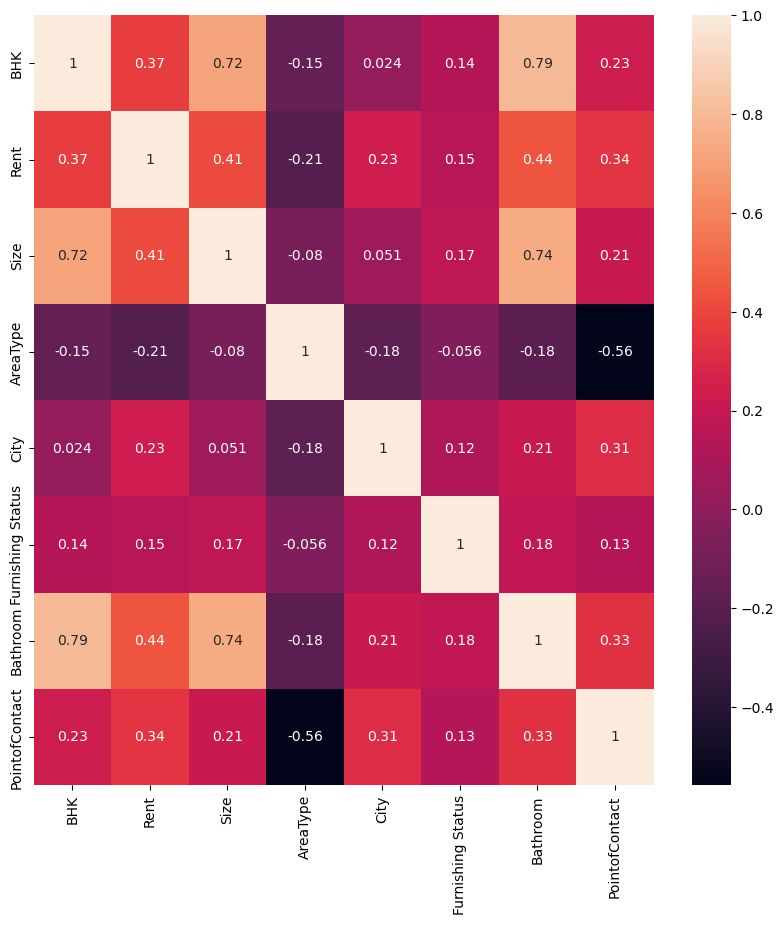

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

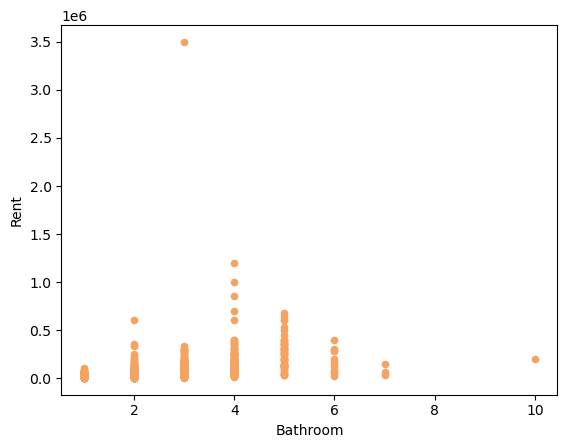

In [18]:
data.plot.scatter(x = 'Bathroom', y = 'Rent',
                  color = 'sandybrown')
plt.show()

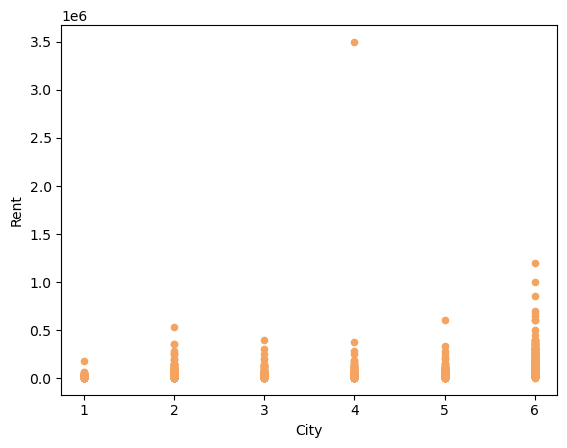

In [19]:
data.plot.scatter(x = 'City', y = 'Rent',
                  color = 'sandybrown')
plt.show()

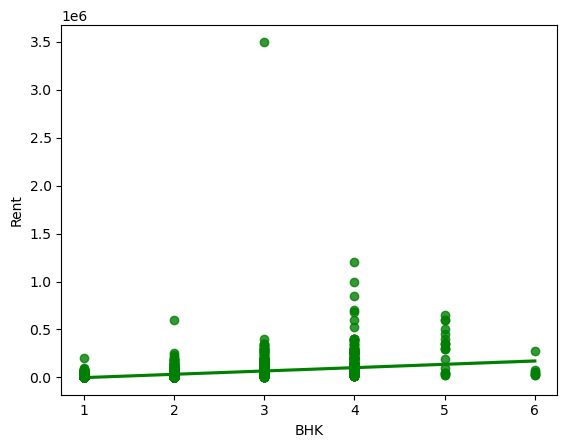

In [20]:
sns.regplot(x = 'BHK', y = 'Rent',data=data,color='g')
plt.show()

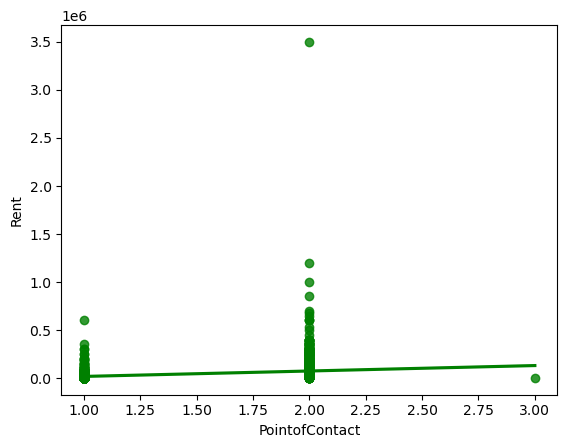

In [21]:
sns.regplot(x = 'PointofContact', y = 'Rent',data=data,color='g')
plt.show()

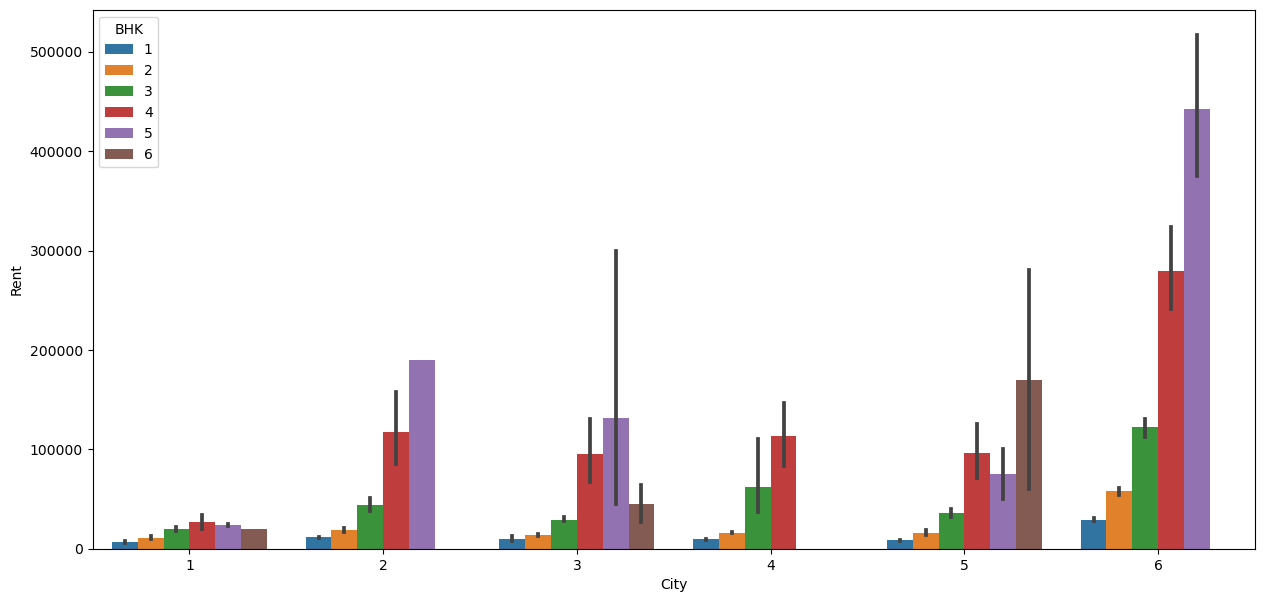

In [22]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['City'], y=data['Rent'], hue=data['BHK'])
plt.show()
            

<Figure size 1500x700 with 0 Axes>

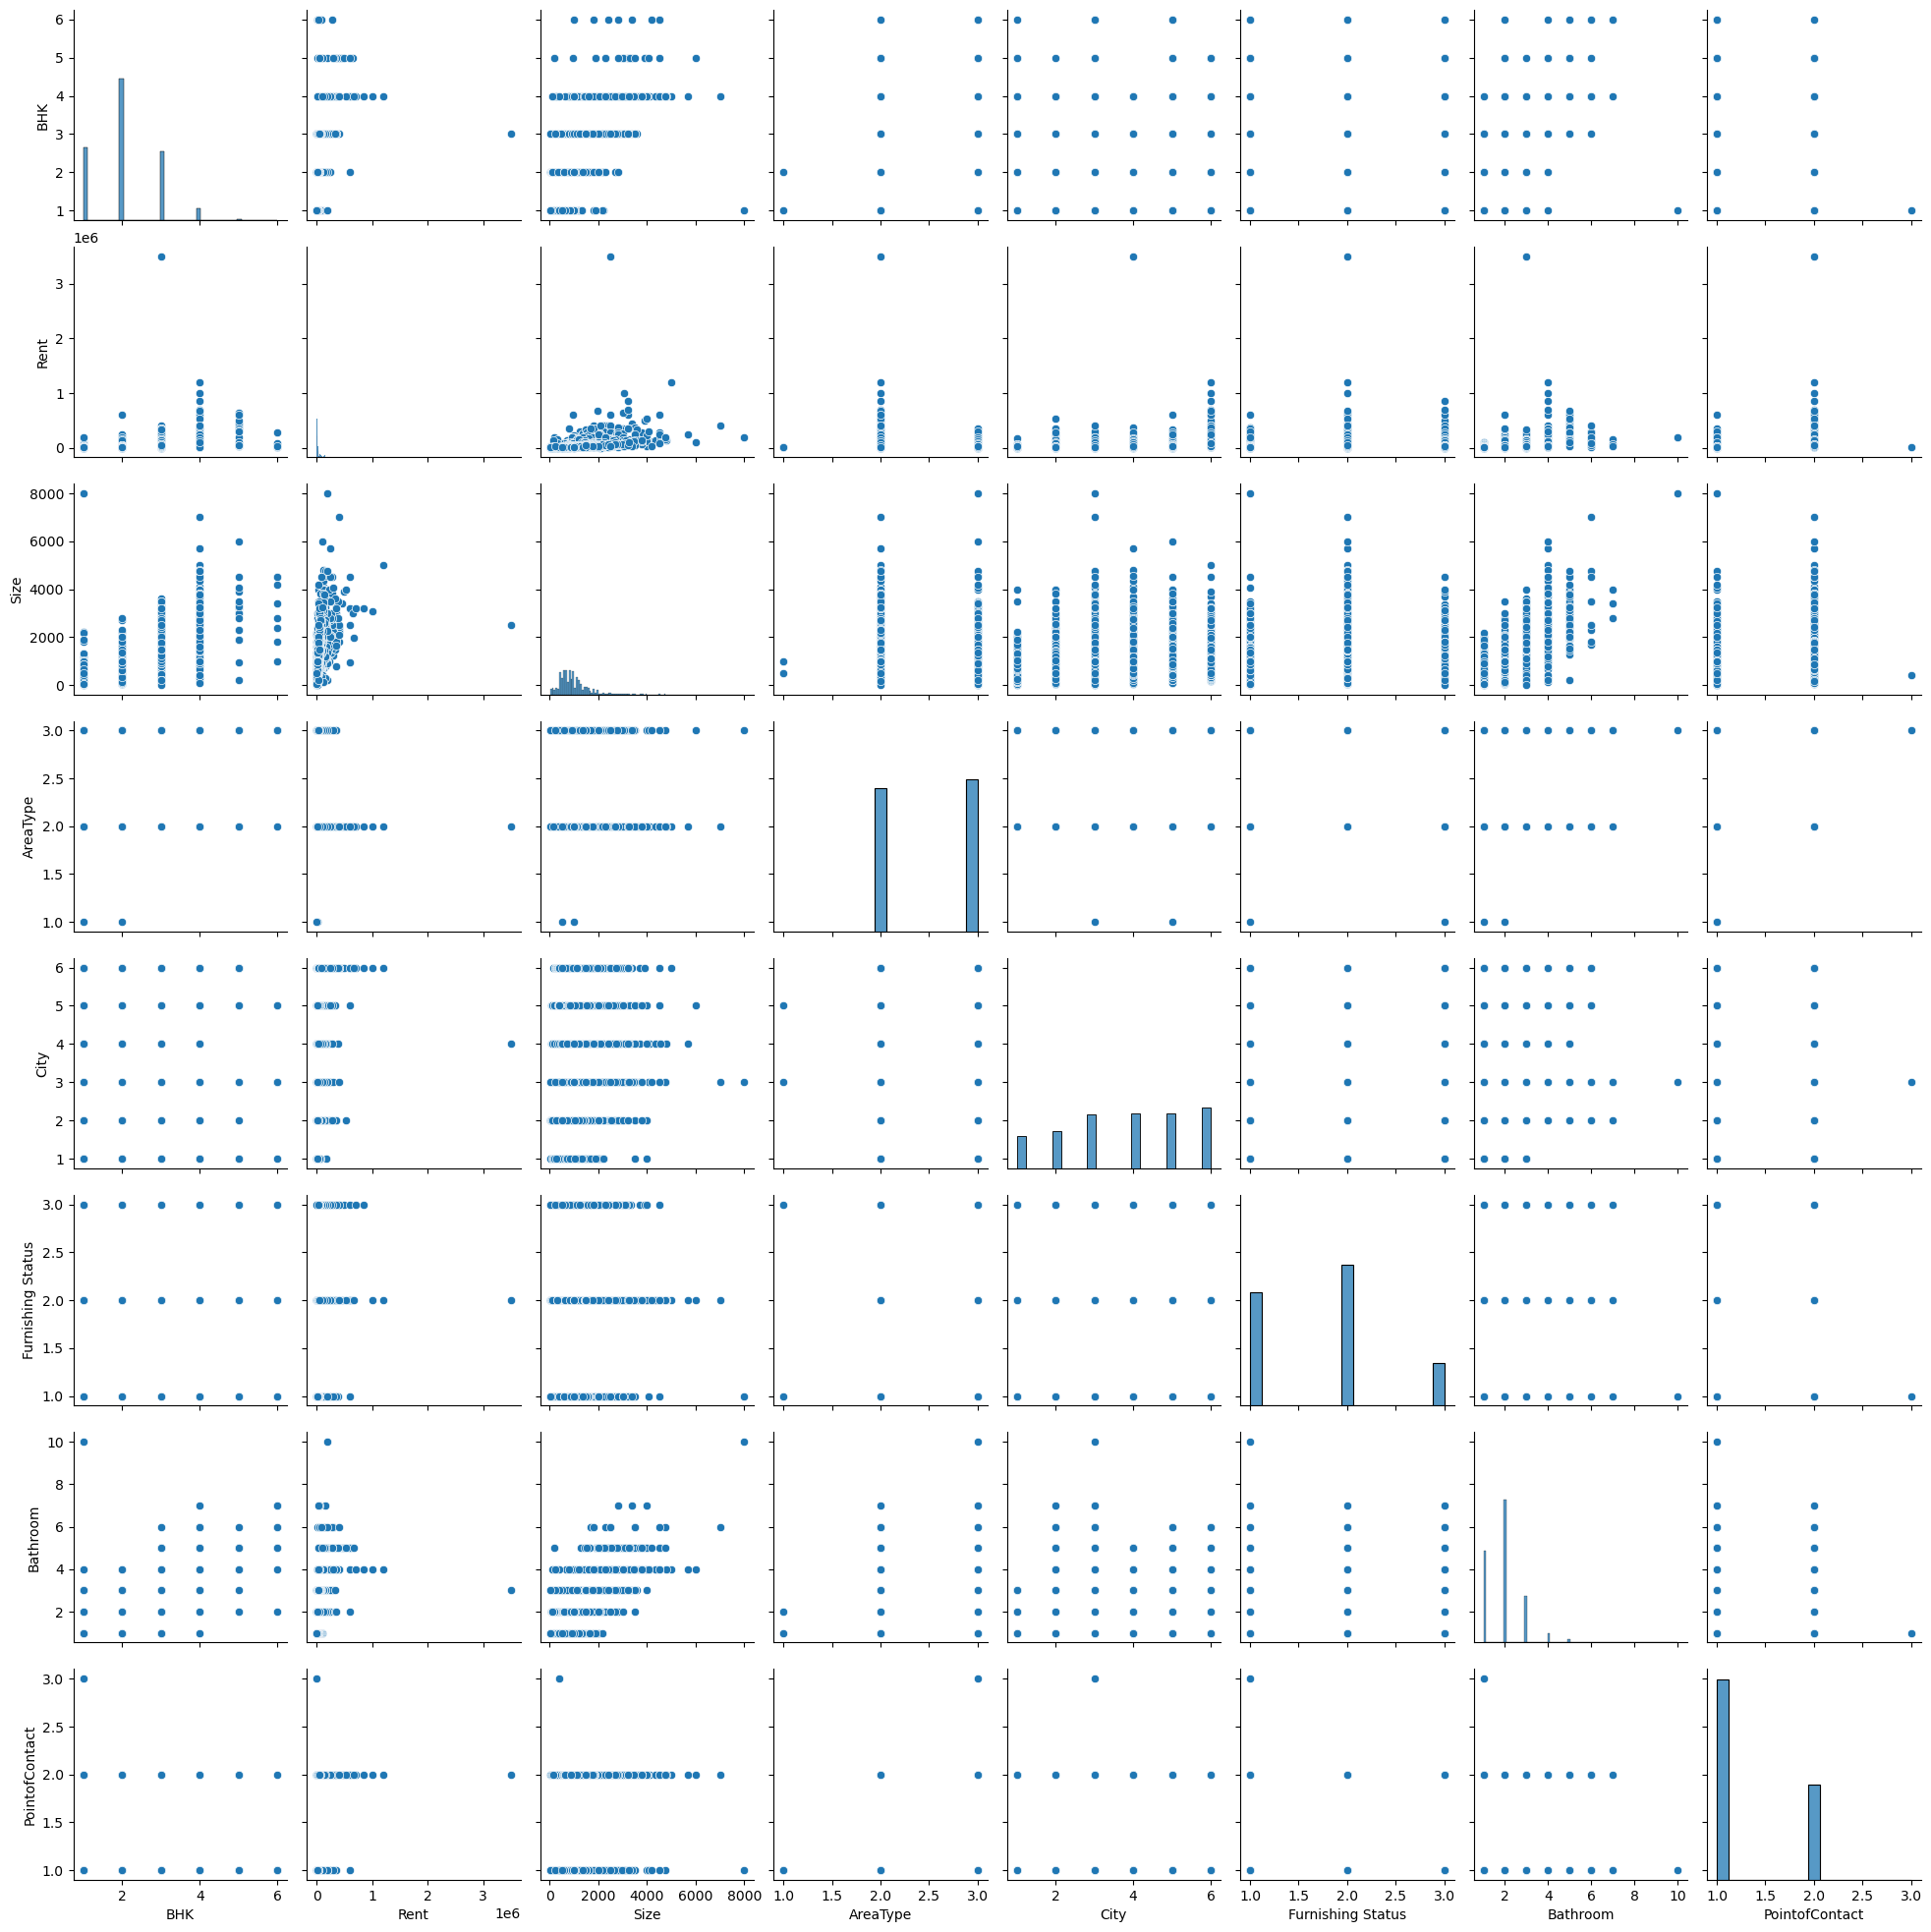

In [23]:
plt.figure(figsize=(15,7))
sns.pairplot(data)   
plt.show()

In [24]:
X = data.drop(['Rent'], axis=1)
Y = data['Rent']

In [25]:
X

,BHK,Size,AreaType,City,Furnishing Status,Bathroom,PointofContact
0,2,1100,3,1,1,2,1
1,2,800,3,1,2,1,1
2,2,1000,3,1,2,1,1
3,2,800,3,1,1,1,1
4,2,850,2,1,1,1,1
...,...,...,...,...,...,...,...
4741,2,1000,2,3,2,2,1
4742,3,2000,3,3,2,3,1
4743,3,1750,2,3,2,3,2
4744,3,1500,2,3,2,2,2


In [26]:
Y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

## Split Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

## DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model=DecisionTreeRegressor()

In [31]:
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [32]:
y_predict = model.predict(X_test)

In [33]:
y_predict

array([60000.        ,  8500.        ,  8500.        , ...,
       20000.        , 12333.33333333,  9500.        ])

In [34]:
model.score(X_train,Y_train)

0.9736555962264593

In [59]:
model.score(X_test,Y_test)

0.2240421499803964

## Accuracy

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(Y_test, y_predict)*100

21.870694050780227

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mean_squared_error(Y_test, y_predict)

9869109602.51284

In [40]:
np.sqrt(mean_squared_error(Y_test, y_predict))

99343.39234449789

In [41]:
mean_absolute_error(Y_test, y_predict)

16071.765976123595

In [42]:
path=model.cost_complexity_pruning_path(X_train,Y_train)

In [43]:
path

{'ccp_alphas': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.65804668e+08, 3.51528329e+08, 1.23465648e+09]),
 'impurities': array([8.68206976e+07, 8.68206976e+07, 8.68206976e+07, ...,
        1.35788992e+09, 2.06094658e+09, 3.29560306e+09])}

In [44]:
alphas=path['ccp_alphas']

In [45]:
alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.65804668e+08, 3.51528329e+08, 1.23465648e+09])

In [46]:
len(alphas)

1566

In [47]:
alphas.min()

0.0

In [48]:
alphas.max()

1234656480.3322148

In [49]:
accuracy_train=[]
accuracy_test=[]

for i in alphas:
    model=DecisionTreeRegressor(ccp_alpha=i)
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    
    accuracy_train.append(r2_score(Y_train, y_predict_train))
    accuracy_test.append(r2_score(Y_test, y_predict_test))
    

In [50]:
accuracy_train

[0.9736555962264593,
 0.9736555962264593,
 0.9736555962264593,
 0.9736555962264593,
 0.9736555962264593,
 0.9736555962264593,
 0.9736555962263679,
 0.9736555962263679,
 0.9736555961959209,
 0.9736555954347464,
 0.9736555935318102,
 0.9736555923900484,
 0.9736555912482867,
 0.9736555899434162,
 0.9736555862897786,
 0.9736555862897786,
 0.9736555843868423,
 0.9736555822120581,
 0.9736555707944405,
 0.9736555707944405,
 0.9736555671103561,
 0.9736555633044836,
 0.973655559498611,
 0.9736555556927385,
 0.9736555515823963,
 0.9736555470153493,
 0.9736555424483023,
 0.9736555367394936,
 0.9736555310306849,
 0.9736555245063321,
 0.9736555176557616,
 0.9736555100440166,
 0.9736554948205267,
 0.9736554872087817,
 0.9736554795970368,
 0.9736554719852918,
 0.9736554548588656,
 0.9736554445830099,
 0.9736554337840198,
 0.9736552739373755,
 0.9736552739373755,
 0.9736552739373755,
 0.9736552739373755,
 0.9736552739373755,
 0.9736552739373755,
 0.9736552739373755,
 0.9736552739373755,
 0.97365527393

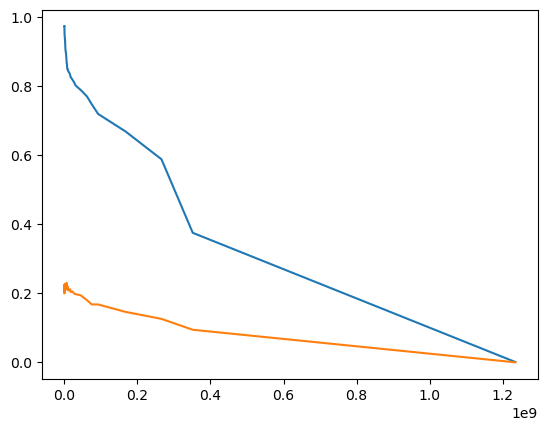

In [51]:
sns.lineplot(y=accuracy_train,x=alphas)
sns.lineplot(y=accuracy_test,x=alphas)
plt.show()

In [52]:
model=DecisionTreeRegressor(ccp_alpha=1.5,max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=1.5, max_depth=5)

In [53]:
model.score(X_train,Y_train)

0.8640564168826426

In [54]:
model.score(X_test,Y_test)

0.2240421499803964

In [55]:
Y_predict=model.predict(X_test)

In [56]:
r2_score(Y_test,y_predict)

0.21870694050780226

In [57]:
from sklearn import tree

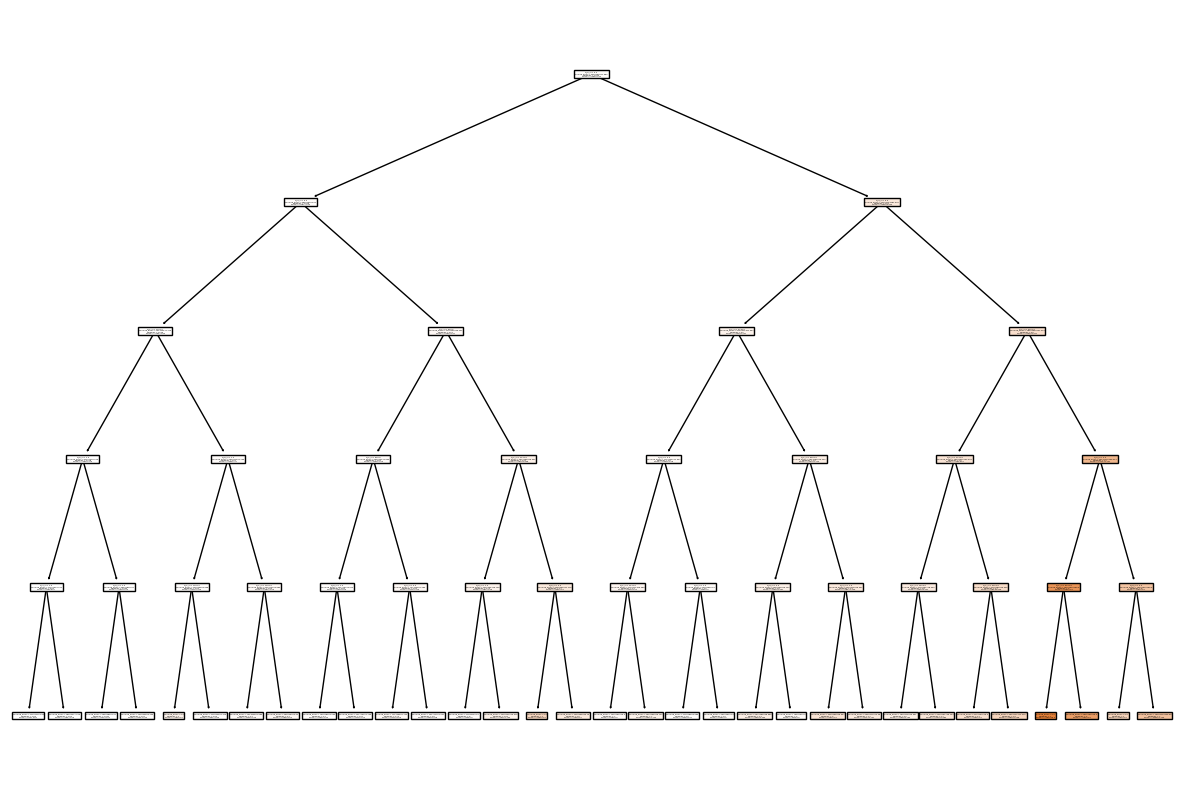

In [58]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()